In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
INPUT_DATA_1 = "C:\\Users\\User\\Desktop\\ML\\Titanic\\data\\train.csv"
INPUT_DATA_2 = "C:\\Users\\User\\Desktop\\ML\\Titanic\\data\\test.csv"
INPUT_DATA_3 = "C:\\Users\\User\\Desktop\\ML\\Titanic\\data\\gender_submission.csv"

In [3]:
df_train = pd.read_csv(INPUT_DATA_1)
print(df_train.shape)
df_train.head(3)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
df_test = pd.read_csv(INPUT_DATA_2)
print(df_test.shape)
df_test.head(3)

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [5]:
df_gender = pd.read_csv(INPUT_DATA_3)
print(df_gender.shape)
df_gender.head(3)

(418, 2)


,PassengerId,Survived
0,892,0
1,893,1
2,894,0


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df_full = pd.concat([df_train, df_test], axis=0, ignore_index=True)
print(df_full.shape)
df_full.head(3)
#df_full.tail(3)

(1309, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [9]:
df_full.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [10]:
df_full.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,1309.000000,891.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,655.000000,0.383838,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,378.020061,0.486592,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,328.000000,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,655.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,982.000000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


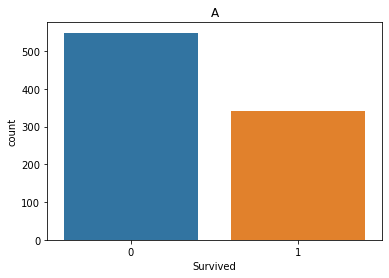

0    549
1    342
Name: Survived, dtype: int64

In [11]:
sns.countplot(x='Survived', data=df_train)
plt.title("A")
plt.show()
df_train['Survived'].value_counts()

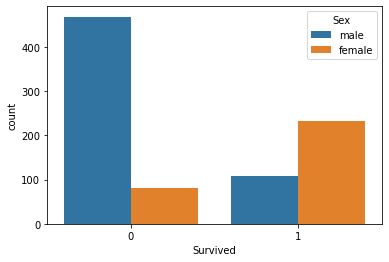

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [12]:
sns.countplot(x='Survived', hue='Sex', data=df_train)
plt.show()
df_train[['Survived','Sex']].groupby(['Sex']).mean().reset_index()

In [13]:
display(df_train.head(3))
df_train.info()
#df_train.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

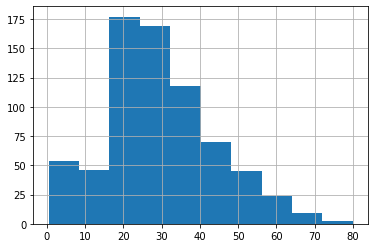

In [14]:
df_train['Age'].hist()
#df_train['Age'].mean()

In [15]:
df_train['Age'] = df_train['Age'].fillna(30)
df_test['Age'] = df_test['Age'].fillna(30)

In [16]:
print(df_train['Age'].isnull().sum())
print(df_test['Age'].isnull().sum())

0
0


In [17]:
df_train[df_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [18]:
df_train['PassengerId'].isin([62,830]).sum()

2

In [19]:
df_train.loc[df_train['PassengerId'].isin([62,830]), 'Embarked'] = 'C'
df_train[df_train['PassengerId'].isin([62,830])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,C
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,C


In [20]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

In [21]:
df_train[['Pclass','Fare']].groupby(['Pclass']).mean()

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


In [22]:
df_test.loc[df_test['Fare'].isnull(),'Fare']=13.67555
#df_test[df_test['Fare'].isnull()]

In [23]:
df_train = df_train.drop(['Cabin'], axis=1)
df_test = df_test.drop(['Cabin'], axis=1)

In [24]:
df_train = df_train.drop(['Name', 'Ticket'], axis=1)
df_test = df_test.drop(['Name', 'Ticket'], axis=1)

In [25]:
print(df_train.isnull().sum())
print(df_test.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [26]:
df_train.loc[df_train['Sex']=='male', 'Sex']=0
df_train.loc[df_train['Sex']=='female', 'Sex']=1
print(df_train['Sex'].value_counts())

0    577
1    314
Name: Sex, dtype: int64


In [27]:
df_test.loc[df_test['Sex']=='male', 'Sex']=0
df_test.loc[df_test['Sex']=='female', 'Sex']=1
print(df_test['Sex'].value_counts())

0    266
1    152
Name: Sex, dtype: int64


In [28]:
print(df_train['Embarked'].value_counts())

S    644
C    170
Q     77
Name: Embarked, dtype: int64


In [29]:
print(df_test['Embarked'].value_counts())

S    270
C    102
Q     46
Name: Embarked, dtype: int64


In [30]:
df_train.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,S
1,2,1,1,1,38.0,1,0,71.2833,C
2,3,1,3,1,26.0,0,0,7.9250,S


In [31]:
df_train = pd.get_dummies(df_train, columns=['Embarked'])
df_test = pd.get_dummies(df_test, columns=['Embarked'])
df_train.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,7.2500,0,0,1
1,2,1,1,1,38.0,1,0,71.2833,1,0,0
2,3,1,3,1,26.0,0,0,7.9250,0,0,1


In [32]:
x_train = df_train.drop(['PassengerId','Survived'], axis=1)
y_train = df_train['Survived']
x_test = df_test.drop(['PassengerId'], axis=1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(891, 9)
(891,)
(418, 9)


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [34]:
seed = 123456789

In [35]:
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)
for train_idx, test_idx in skf.split(x_train, y_train):
    x_train_cv = x_train.iloc[train_idx]
    x_test_cv = x_train.iloc[test_idx]
    y_train_cv = y_train.iloc[train_idx]
    y_test_cv = y_train.iloc[test_idx]
    model = RandomForestClassifier(random_state=seed)
    model.fit(x_train_cv, y_train_cv)
    print(accuracy_score(y_test_cv, model.predict(x_test_cv)))

0.8181818181818182
0.7912457912457912
0.797979797979798


In [36]:
model = RandomForestClassifier(random_state=seed)
model.fit(x_train, y_train)
#print(model)

RandomForestClassifier(random_state=123456789)

In [37]:
df_out = pd.concat([df_test[['PassengerId']], pd.DataFrame(model.predict(x_test))], axis=1)
df_out.columns = ['PassengerId', 'Survived']
df_out.to_csv("C:\\Users\\User\\Desktop\\ML\\Titanic\\20230618\\output\\df_out_1.csv", index=False)
df_out.head(3)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0


In [38]:
!pip install lightgbm

In [39]:
import lightgbm as lgb

In [49]:
x_train['Sex'] = x_train['Sex'].astype(int)
x_test['Sex'] = x_test['Sex'].astype(int)

In [54]:
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)
for train_idx, test_idx in skf.split(x_train, y_train):
    x_train_cv = x_train.iloc[train_idx]
    x_test_cv = x_train.iloc[test_idx]
    y_train_cv = y_train.iloc[train_idx]
    y_test_cv = y_train.iloc[test_idx]
    model = lgb.LGBMClassifier(objective='binary', num_leaves=150, learning_rate=0.1) # , random_state=seed
    model.fit(x_train_cv, y_train_cv, eval_set=[(x_test_cv, y_test_cv)]) # , early_stopping_rounds=30
    print(accuracy_score(y_test_cv, model.predict(x_test_cv)))

[1]	valid_0's binary_logloss: 0.624647
[2]	valid_0's binary_logloss: 0.589527
[3]	valid_0's binary_logloss: 0.562519
[4]	valid_0's binary_logloss: 0.53839
[5]	valid_0's binary_logloss: 0.517934
[6]	valid_0's binary_logloss: 0.501562
[7]	valid_0's binary_logloss: 0.488515
[8]	valid_0's binary_logloss: 0.476137
[9]	valid_0's binary_logloss: 0.462028
[10]	valid_0's binary_logloss: 0.453343
[11]	valid_0's binary_logloss: 0.44284
[12]	valid_0's binary_logloss: 0.435005
[13]	valid_0's binary_logloss: 0.428557
[14]	valid_0's binary_logloss: 0.422456
[15]	valid_0's binary_logloss: 0.415929
[16]	valid_0's binary_logloss: 0.410139
[17]	valid_0's binary_logloss: 0.405723
[18]	valid_0's binary_logloss: 0.400984
[19]	valid_0's binary_logloss: 0.397274
[20]	valid_0's binary_logloss: 0.393712
[21]	valid_0's binary_logloss: 0.390733
[22]	valid_0's binary_logloss: 0.387552
[23]	valid_0's binary_logloss: 0.383851
[24]	valid_0's binary_logloss: 0.384023
[25]	valid_0's binary_logloss: 0.379309
[26]	valid_

[70]	valid_0's binary_logloss: 0.504766
[71]	valid_0's binary_logloss: 0.505395
[72]	valid_0's binary_logloss: 0.506831
[73]	valid_0's binary_logloss: 0.507238
[74]	valid_0's binary_logloss: 0.5076
[75]	valid_0's binary_logloss: 0.507037
[76]	valid_0's binary_logloss: 0.508733
[77]	valid_0's binary_logloss: 0.509196
[78]	valid_0's binary_logloss: 0.510828
[79]	valid_0's binary_logloss: 0.512526
[80]	valid_0's binary_logloss: 0.514657
[81]	valid_0's binary_logloss: 0.515076
[82]	valid_0's binary_logloss: 0.514003
[83]	valid_0's binary_logloss: 0.514902
[84]	valid_0's binary_logloss: 0.516854
[85]	valid_0's binary_logloss: 0.518342
[86]	valid_0's binary_logloss: 0.519519
[87]	valid_0's binary_logloss: 0.519888
[88]	valid_0's binary_logloss: 0.520136
[89]	valid_0's binary_logloss: 0.521477
[90]	valid_0's binary_logloss: 0.523655
[91]	valid_0's binary_logloss: 0.525292
[92]	valid_0's binary_logloss: 0.52627
[93]	valid_0's binary_logloss: 0.526831
[94]	valid_0's binary_logloss: 0.529826
[95

In [55]:
model = lgb.LGBMClassifier(objective='binary', num_leaves=150, learning_rate=0.1) # , random_state=seed
model.fit(x_train_cv, y_train_cv, eval_set=[(x_test_cv, y_test_cv)]) # , early_stopping_rounds=30
#print(model)

[1]	valid_0's binary_logloss: 0.625385
[2]	valid_0's binary_logloss: 0.593604
[3]	valid_0's binary_logloss: 0.568456
[4]	valid_0's binary_logloss: 0.548009
[5]	valid_0's binary_logloss: 0.531921
[6]	valid_0's binary_logloss: 0.517926
[7]	valid_0's binary_logloss: 0.505795
[8]	valid_0's binary_logloss: 0.496749
[9]	valid_0's binary_logloss: 0.489071
[10]	valid_0's binary_logloss: 0.48269
[11]	valid_0's binary_logloss: 0.474889
[12]	valid_0's binary_logloss: 0.469259
[13]	valid_0's binary_logloss: 0.464023
[14]	valid_0's binary_logloss: 0.460533
[15]	valid_0's binary_logloss: 0.459186
[16]	valid_0's binary_logloss: 0.456623
[17]	valid_0's binary_logloss: 0.457496
[18]	valid_0's binary_logloss: 0.456842
[19]	valid_0's binary_logloss: 0.456918
[20]	valid_0's binary_logloss: 0.456143
[21]	valid_0's binary_logloss: 0.45783
[22]	valid_0's binary_logloss: 0.458239
[23]	valid_0's binary_logloss: 0.459829
[24]	valid_0's binary_logloss: 0.460467
[25]	valid_0's binary_logloss: 0.459784
[26]	valid_

LGBMClassifier(num_leaves=150, objective='binary')

In [56]:
df_out = pd.concat([df_test[['PassengerId']], pd.DataFrame(model.predict(x_test))], axis=1)
df_out.columns = ['PassengerId', 'Survived']
df_out.to_csv("C:\\Users\\User\\Desktop\\ML\\Titanic\\20230618\\output\\df_out_2.csv", index=False)
df_out.head(3)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
